## **Bellabeat Company Case Study**

### How Can a Wellness Technology Company Play It Smart?

Hi! The following notebook file is a company analysis that I have created as a part of the *Google Data Analytics Certificate Program* offered by Coursera. The objective of this case study is to utilize **R** to showcase in-depth analysis as well as visualizations that support the hypothesized outcomes and possible business avenues presented at the end. All of the **.csv files** used can be found as a *public data-set* on Kaggle at the following [link](https://www.kaggle.com/arashnic/fitbit). 

## About the Company

Bellabeats is a high-tech company that manufactures health-focused smart products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their [website](https://bellabeat.com/). The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

* **Products**
  + **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
  + **Wellness trackers**: Bellabeat supports 3 mainline products:*Leaf, Time,* and *Spring*, which can be connected to the Bellabeat app to give real-time information about health, wellness, activity, sleep, stress etc. 
  + **Bellabeat membership**: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.
  
## Business Tasks

1. Analysis of smart device usage data from non-Bellabeats products to gain insights into how customers may be using the product, allowing Bellabeats to improve on specific functions that may benefit their consumer based.

2. Creating new marketing opportunities for Bellabeat using ad-hoc analysis of FitBit data, to create a more competitive **Time** product line of wellness devices in the market of wearable fitness.

Some of the key stakeolders for this project include: *Urška Sršen*, Bellabeat’s cofounder and Chief Creative Officer, *Sando Mur*, Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team, as well as the Bellabeat team of data and marketing analytics. 

## Data Sources

For this research project we will be using the [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for *physical activity*, *heart rate*, and *sleep monitoring*. It includes information about **daily activity**, **steps**, and **heart rate** that can be used to explore users’ habits.

This dataset is very comprehensive, as it provides minute-level information about the users. For the purpose of this project I will be focusing on the fluctuations at the daily level to look for general trend-lines and correlational relationships. 

## 1. Setting Up the Environment

First we will set up the *R* environment (which was all run in **RStudio**).


In [1]:
```{r package installation, eval=FALSE, message=FALSE, warning=FALSE}
# installing relevant packages for analysis
install.packages("tidyverse")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("readr")
install.packages("lubridate")
install.packages("anytime")
install.pacakges("gridExtra")
```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


We will also have to load the given libraries (**which needs to only be done once a session**)

In [2]:
# loading libraries for packages
library(tidyverse)
library(dplyr)
library(ggplot2)
library(readr)
library(lubridate)
library(anytime)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## 2. Importing and Previewing Data

Next we will import the necessary *.csv files*

In [3]:
# importing relevant datasets
dailyActivity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
weightLogInfo <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
sleepDay <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
METsData <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  Date = col_character(),
  WeightKg = col_double(),
  WeightPounds = col_double(),
  Fat = col_double(),
  BMI = col_double(),
  IsManualReport = col_logical(),
  LogId = col_double()
)



── Column specification ────────────────────────────────────────────────────────
c

We can also run certain functions to preview our data frames, such as: **colnames( )**, **glimpse( )**, **head( )**, **summary( )**, **View( )** etc.

In [4]:
# to preview short lists of the dataframes
head(dailyActivity)
head(weightLogInfo)
head(sleepDay)
head(METsData)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityMinute,METs
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12


Let's get a feel for all the different column names that we will be analyzing!

In [5]:
# to see all the column names of the dataframes in a quick format
colnames(dailyActivity)
colnames(weightLogInfo)
colnames(sleepDay)
colnames(METsData)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"             "ActivityMinute" "METs"

Now let's get some general *summary statistics* for some of the data frames that we're going to be working with.

In [6]:
# some summary statistics: Merged daily activities
summary(dailyActivity)
summary(weightLogInfo)
summary(sleepDay)
summary(METsData)

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport      LogId          
 Min.   :22.00   Min.   :21.45   Mode :logical   Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   FALSE:26        1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   TRUE :41        Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                   Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                   3rd Qu.:1.462e+12  
 M

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

       Id            ActivityMinute          METs       
 Min.   :1.504e+09   Length:1325580     Min.   :  0.00  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 10.00  
 Median :4.445e+09   Mode  :character   Median : 10.00  
 Mean   :4.848e+09                      Mean   : 14.69  
 3rd Qu.:6.962e+09                      3rd Qu.: 11.00  
 Max.   :8.878e+09                      Max.   :157.00  

Next, it's good to see how many unique values we have distinguished by **ID**, to see if some of the data frames have more observations than others..

In [7]:
# let's look compare the distinct values by "Id"
n_distinct(dailyActivity$Id)
n_distinct(sleepDay$Id)
n_distinct(weightLogInfo$Id)
n_distinct(METsData$Id)

[1] 33

[1] 24

[1] 8

[1] 33

In [8]:
# we can also compare the two specific data frames by the number of rows that they have
nrow(dailyActivity)
nrow(sleepDay)

[1] 940

[1] 413

Looking at some of the results for these functions we notice that the dailyActivity data fram has **33** unique *"ID"* values, while the sleepDay data frame has only **24**. This indicates that we have more users tracking daily activity data: such as *steps*, *distance*, *active minutes*. There is also a large discrepancy in the number of *rows* for each data frame, taking a look at the previews shows us that some of the data for *sleepDays* are not being recorded. The number of unique values organized by *ID* is even less for the weightLogInfo data frame, meaning that less users are inputting their *weight*, *BMI*, and *Fat* information.

It is also important to note that looking at the *min* and *max* values for the date columns in the data frames, that the data is recorded between the time of **04-12-2016** and **05-12-2016**. 

We will run seperate as well as combined analyses for the given data frames, however these points are important to keep in mind when interpreting the results.

## 3. Cleaning and Sorting Data

Now let's create some *summary tables* to gain some perspective on the aggregate data. First let's address the null values from the dailyActivity table!

In [9]:
# checking for null values
dailyActivity %>% 
  count(dailyActivity$TotalSteps == 0)

dailyActivity$TotalSteps == 0,n
<lgl>,<int>
FALSE,863
TRUE,77


So the data tells us that we have **77** missing values.

In [10]:
# filtering out the null values and creating a summary table
summary_activity <- dailyActivity %>% 
  filter(TotalSteps > 0) %>% 
  group_by(Id) %>% 
  summarize(average_steps = mean(TotalSteps), average_calories = mean(Calories), average_distance = mean(TotalDistance), sum_steps = sum(TotalSteps))
head(summary_activity)

# creating a summary table of users based on sleep patterns
summary_sleep <- sleepDay %>% 
  group_by(Id) %>% 
  summarize(average_minutes_slept = mean(TotalMinutesAsleep), average_number_sleepsession = mean(TotalSleepRecords), average_minutes_inbed = mean(TotalTimeInBed))
head(summary_sleep)

# creating a summary table of users based on weight information
summary_weight <- weightLogInfo %>% 
  group_by(Id) %>% 
  summarize(average_weight = mean(WeightPounds), average_BMI = mean(BMI))
head(summary_weight)

Id,average_steps,average_calories,average_distance,sum_steps
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12520.633,1876.967,8.070000,375619
1624580081,5743.903,1483.355,3.914839,178061
1644430081,7282.967,2811.300,5.295333,218489
1844505072,3808.667,1713.762,2.518571,79982
1927972279,1670.588,2303.059,1.157059,28400
2022484408,11370.645,2509.968,8.084193,352490


Id,average_minutes_slept,average_number_sleepsession,average_minutes_inbed
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,360.2800,1.08,383.2000
1644430081,294.0000,1.00,346.0000
1844505072,652.0000,1.00,961.0000
1927972279,417.0000,1.60,437.8000
2026352035,506.1786,1.00,537.6429
2320127002,61.0000,1.00,69.0000


Id,average_weight,average_BMI
<dbl>,<dbl>,<dbl>
1503960366,115.9631,22.650
1927972279,294.3171,47.540
2873212765,125.6635,21.570
4319703577,159.5045,27.415
4558609924,153.5299,27.214
5577150313,199.9593,28.000


Next I will change some of the column **names** and **types**, so that all the data frames are uniform in that respect (so that we can *combine* the data frames for a more complete look at all of the dataset)

In [11]:
# changing ActivityDate column to date type and renaming to Date
dailyActivity$ActivityDate <- lubridate::mdy(dailyActivity$ActivityDate)
dailyActivity <- rename(dailyActivity, c("Date" = "ActivityDate")) 
dailyActivity <- filter(dailyActivity, TotalSteps > 0)
glimpse(dailyActivity)

# changing SleepDay column to date type and renaming to Date
sleepDay$SleepDay <- anytime::anydate(sleepDay$SleepDay)
sleepDay <- rename(sleepDay, c("Date" = "SleepDay"))
glimpse(sleepDay)

# changing Date column to date type
weightLogInfo$Date <- anytime::anydate(weightLogInfo$Date)
glimpse(weightLogInfo)

Rows: 863
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Now all the *date* values from the data frames should be **date** types, allowing for easy *joins* in the future. 

Now let's aggregate the *MET (Metabolic Equivalents in Exercise Testing)* under daily values to crate better comparisons with other segments of the data.

* **MET (Metabolic Equivalents in Exercise Testing)**: A MET is a way to measure your body’s expenditure of energy. The higher the MET value of a particular activity, the more energy your muscles will need to expend to do that activity.

In [12]:
# aggregating MET data into daily time frames
MET_daily_data <- METsData %>% 
  separate(ActivityMinute, c("Date", "Time"), sep = " ") %>% 
  select(Id, Date, METs) %>% 
  group_by(Id, Date) %>% 
  summarize("Daily METs" = sum(METs))
head(MET_daily_data)

# changing Date column to date type
MET_daily_data$Date <- anytime::anydate(MET_daily_data$Date)
MET_data <- rename(MET_daily_data, c("METs" = "Daily METs"))
glimpse(MET_daily_data)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 1325580 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



Id,Date,Daily METs
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,25241
1503960366,4/13/2016,22859
1503960366,4/14/2016,22589
1503960366,4/15/2016,22190
1503960366,4/16/2016,23694
1503960366,4/17/2016,21972


Rows: 934
Columns: 3
Groups: Id [33]
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ Date         <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-15, 2016-04-…
$ `Daily METs` <dbl> 25241, 22859, 22589, 22190, 23694, 21972, 24433, 25883, 2…


Let's create some new categories for the *MET_data* to better break down the ranges of metabolically active minutes.

In [13]:
# creating categories based on MET minutes per day
MET_data <- MET_data %>% 
  group_by(Id) %>% 
  mutate(MET_user = factor(case_when(METs >= 23562 ~ "Very Active", 
                                     METs >= 21060 ~ "Fairly Active",
                                     METs >= 17908 ~ "Lightly Active",
                                     METs < 17908 ~ "Sedentary"),
                           levels = c("Very Active", "Fairly Active", "Lightly Active",
                                      "Sedentary"))) %>% 
  drop_na()

Next we will take a deeper look into the **sleepDay** data frame! If you noticed within the summary tables, the columns are organized in minutes (which can make a visual analysis a little difficult, since we are used to measuring sleep in hours). Let's use the **mutate( )** function to create some new columns that are more legible and place them in a new frame called *sleep_in_hours*.

In [14]:
# Transforming sleep minute data into hourly data
sleep_in_hours <- mutate(sleepDay, TotalHoursAsleep = TotalMinutesAsleep / 60, TotalHoursInBed = TotalTimeInBed / 60)
sleep_in_hours <- mutate(sleep_in_hours, TotalMinutesAwake = TotalTimeInBed - TotalMinutesAsleep)
head(sleep_in_hours)

Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHoursInBed,TotalMinutesAwake
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346,5.450000,5.766667,19
1503960366,2016-04-13,2,384,407,6.400000,6.783333,23
1503960366,2016-04-15,1,412,442,6.866667,7.366667,30
1503960366,2016-04-16,2,340,367,5.666667,6.116667,27
1503960366,2016-04-17,1,700,712,11.666667,11.866667,12
1503960366,2016-04-19,1,304,320,5.066667,5.333333,16


These classifications will show us the best sleep sessions grouped by *ID*. 

Next let's create some new columns for the data frames to gain a better perspective on some of the numbers presented in the data. First we will classify the different type of sleepers using the following categorizations:

1. **High Efficient Sleepers**: These are sleep sessions that are above the average time asleep and are also spending lower than average hours awake in bed.

2. **High Inefficient Sleepers**: These are sleep sessions that are above the average time asleep but spend higher than average hours awake in bed.

3. **Low Efficient Sleeper**: These are the sleep sessions that are below the average time asleep but spend lower than average hours awake in bed.

3. **Low Efficient Sleeper**: These are the sleep sessions that are below the average time asleep and are also spending higher than average hours awake in bed.

In [15]:
# creating categories for sleep based on minutes spent awake and minutes asleep
sleep_in_hours <- sleep_in_hours %>% 
  group_by(Id) %>% 
  mutate(sleep_type = factor(case_when(TotalMinutesAsleep > 420 & TotalMinutesAwake < 15 ~ "High Efficient Sleeper", 
                                       TotalMinutesAsleep > 420 & TotalMinutesAwake > 15 ~ "High Inefficient Sleeper", 
                                       TotalMinutesAsleep < 420 & TotalMinutesAwake < 15 ~ "Low Efficient Sleeper", 
                                       TotalMinutesAsleep < 420 & TotalMinutesAwake > 15 ~ "Low Inefficient Sleeper"), 
                             levels = c("High Efficient Sleeper", "High Inefficient Sleeper", "Low Efficient Sleeper", "Low Inefficient Sleeper"))) %>% 
  drop_na()

Let's also create some categories for sleep based on just the averages (to single out data versus mean sleep times)!

In [16]:
# create rest levels for sleep data
sleep_in_hours <- sleep_in_hours %>% 
  group_by(Id) %>% 
  mutate(rest_level = factor(case_when(TotalMinutesAsleep >= 420 ~ "Well Rested", 
                          TotalMinutesAsleep < 420 ~ "Poorly Rested"),
                levels = c("Well Rested", "Poorly Rested"))) %>% 
  drop_na()
head(sleep_in_hours)

Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHoursInBed,TotalMinutesAwake,sleep_type,rest_level
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1503960366,2016-04-12,1,327,346,5.450000,5.766667,19,Low Inefficient Sleeper,Poorly Rested
1503960366,2016-04-13,2,384,407,6.400000,6.783333,23,Low Inefficient Sleeper,Poorly Rested
1503960366,2016-04-15,1,412,442,6.866667,7.366667,30,Low Inefficient Sleeper,Poorly Rested
1503960366,2016-04-16,2,340,367,5.666667,6.116667,27,Low Inefficient Sleeper,Poorly Rested
1503960366,2016-04-17,1,700,712,11.666667,11.866667,12,High Efficient Sleeper,Well Rested
1503960366,2016-04-19,1,304,320,5.066667,5.333333,16,Low Inefficient Sleeper,Poorly Rested


Now let's create some merged data frames that include all the necessary variables, if we want to do a large-scale analysis involving variable data from multiple data frames. We will use the **full_join( )** and the **left_join( )** functions for this!

In [17]:
# merging the four dataframes by "Id" and "Date"
daily_data <- full_join(dailyActivity, sleep_in_hours, by = c("Id", "Date")) %>% 
  left_join(MET_data) %>% 
  left_join(weightLogInfo)
head(daily_data)

Joining, by = c("Id", "Date")

Joining, by = c("Id", "Date")



Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,sleep_type,rest_level,METs,MET_user,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,Low Inefficient Sleeper,Poorly Rested,25241,Very Active,NA,NA,NA,NA,NA,NA
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,Low Inefficient Sleeper,Poorly Rested,22859,Fairly Active,NA,NA,NA,NA,NA,NA
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,NA,NA,22589,Fairly Active,NA,NA,NA,NA,NA,NA
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,Low Inefficient Sleeper,Poorly Rested,22190,Fairly Active,NA,NA,NA,NA,NA,NA
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,Low Inefficient Sleeper,Poorly Rested,23694,Very Active,NA,NA,NA,NA,NA,NA
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,High Efficient Sleeper,Well Rested,21972,Fairly Active,NA,NA,NA,NA,NA,NA


Next I will create a table with the specific variables that I am trying to explore (which will be **Calories**, **TotalSteps**, *measurements of sleep*, **TotalDistance**, **METs** and **MET_user**). 

In [18]:
# create a usable table that contains all the variables of interest
usage_data <- daily_data %>% 
  group_by(Id) %>% 
  summarise(Calories, METs, MET_user, TotalSteps, TotalDistance, VeryActiveMinutes, FairlyActiveMinutes,
    LightlyActiveMinutes, SedentaryMinutes) %>% 
  drop_na()

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



Let's create a data frame that includes **TotalSleepHours** as well.

In [19]:
# usage and sleep_data combined 
usage_sleep_data <- daily_data %>% 
  group_by(Id) %>% 
  summarise(Calories, METs, MET_user, TotalSteps, TotalDistance, VeryActiveMinutes, FairlyActiveMinutes,
    LightlyActiveMinutes, SedentaryMinutes, TotalHoursAsleep, sleep_type, rest_level) %>% 
  drop_na()

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



Looking at the entirety of data provided by the FitBit source seems to have dissimilar numbers of observations as well as a multitude of *N/A* values. Therefore I will create multiple data frames, it is also important for any readers to be aware of some of these limitations that the data provides! The data frames provided above should give us the most complete set of observations based on users with the most input into the FitBit platform. The usage_sleep_data data frame has a total of **413 observations** while the usage_data data frame has **865 observations** since there were not as many users with data points on sleep patterns.

## 4. Data Analysis and Visualizations

Let's take a look at the relationship between some of the sleep variables to find any discernible patterns that may be useful.

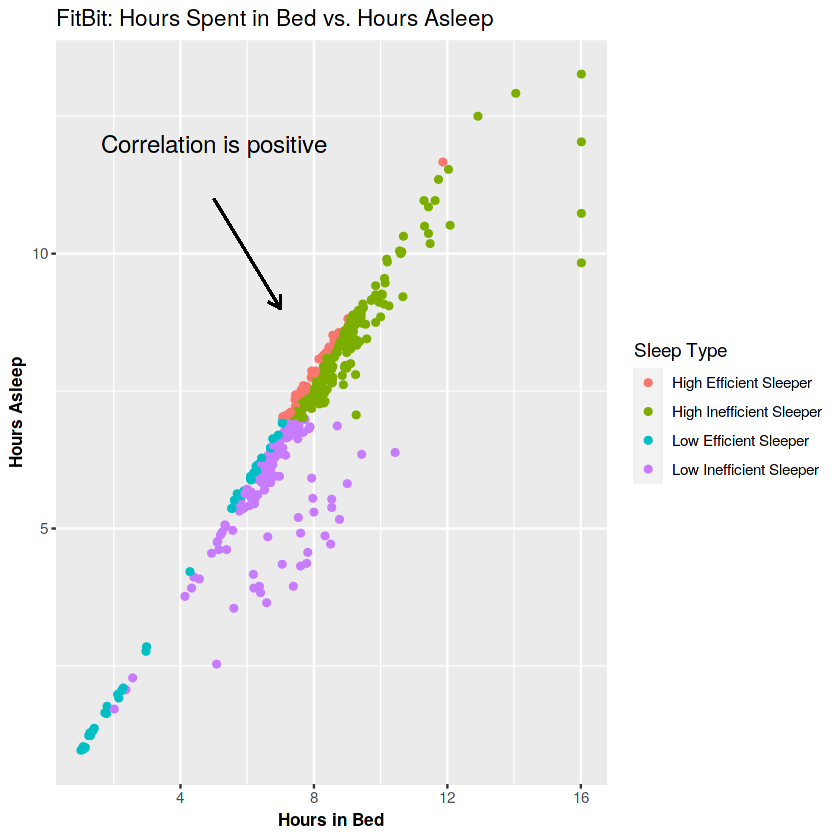

In [20]:
ggplot(sleep_in_hours, aes(y=TotalHoursAsleep, x=TotalHoursInBed, color = sleep_type)) + 
  geom_point() + labs(x = "Hours in Bed", y = "Hours Asleep", title = "FitBit: Hours Spent in Bed vs. Hours Asleep", color = "Sleep Type") +
  geom_segment(aes(x = 5, y = 11, xend = 7, yend = 9), arrow = arrow(length = unit(0.3, "cm")), color = "black") +
  annotate("text", x = 5, y = 12, label = "Correlation is positive", size = 5) +
  theme(axis.title.x = element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

This graph is plotting the relationship between *total hours spent in bed* versus *total hours spent asleep* as well as charting data points by 4 categories (depending on what kind of sleep it was). Looking at the plot there is an obvious positive correlation between the two variables. The data shows us that there is a cluster of users that crowd around the 6-9 hour range by hours asleep and around 6-10 hours in bed. The sleep categorizations also allow us to differentiate users that are spending more time awake in bed on average.

Let's also create a *distribution chart* to confirm the results from our previous plot.

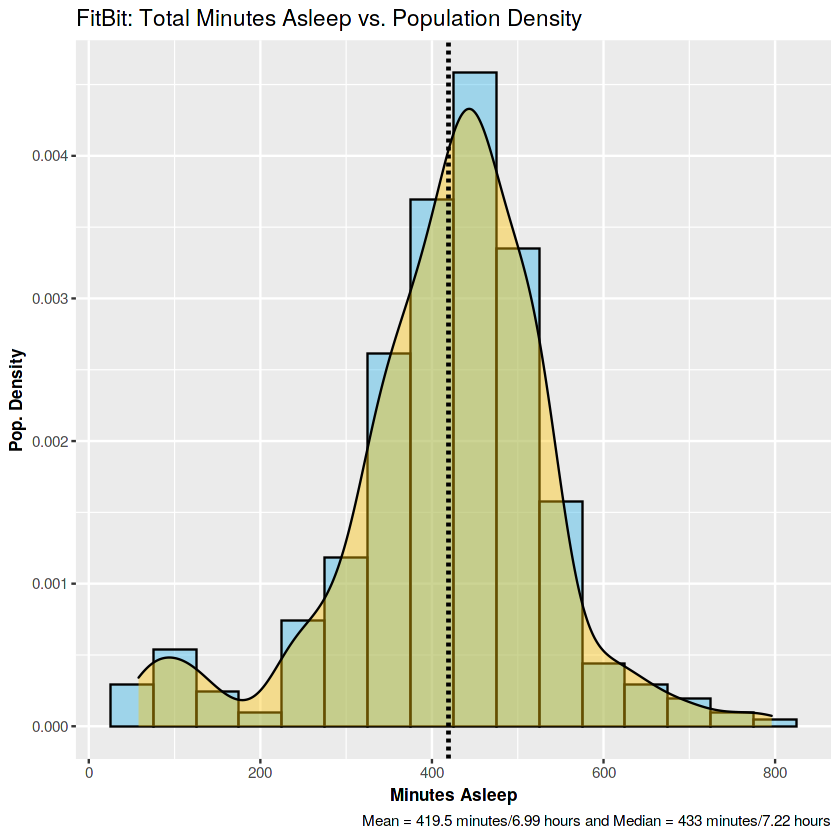

In [21]:
# Normal distribution histogram to reinforce results of plot
ggplot(sleep_in_hours, aes(x = TotalMinutesAsleep)) + geom_histogram(aes(y=..density..), binwidth = 50, alpha = 0.4, fill = "#2BB1E8", color = "black") +
  geom_density(alpha = 0.4, fill = "#FFC300") + geom_vline(aes(xintercept = 
  mean(TotalMinutesAsleep, na.rm = TRUE)), color = "black", linetype = "dashed", size = 1) +
  labs(x = "Minutes Asleep", y = "Pop. Density", title = "FitBit: Total Minutes Asleep vs. Population Density",
    caption = "Mean = 419.5 minutes/6.99 hours and Median = 433 minutes/7.22 hours") + theme(axis.title.x = 
    element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

Looking at these two visualizations and the high number of inefficient sleepers, let's look a bit closer at the times spent in bed **not sleeping**. 

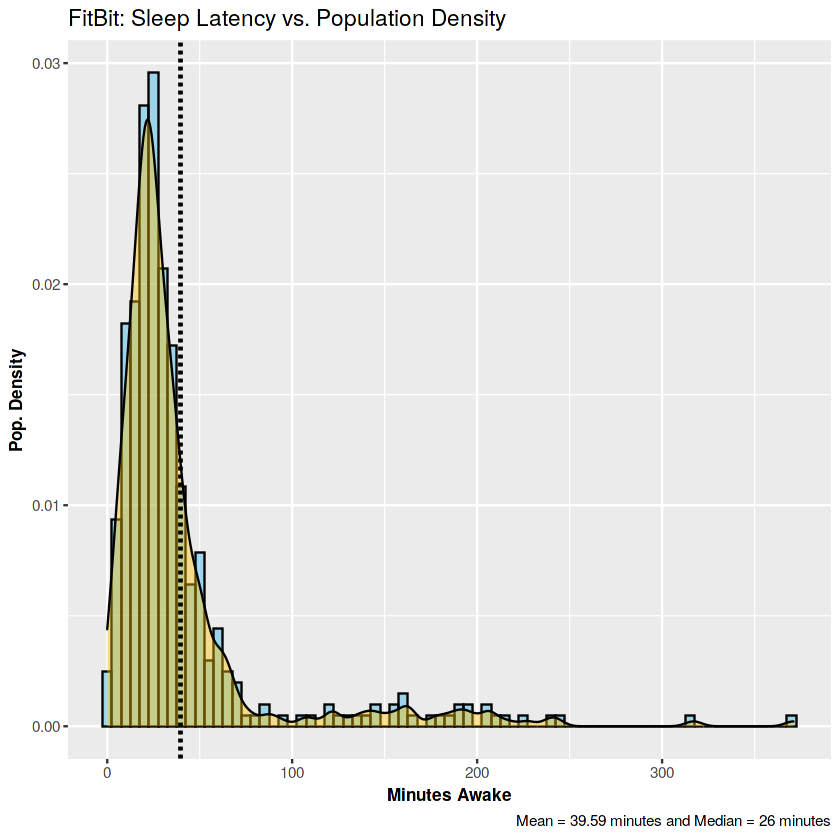

In [22]:
ggplot(sleep_in_hours, aes(x = TotalMinutesAwake)) + geom_histogram(aes(y=..density..), binwidth = 5, alpha = 0.4, fill = "#2BB1E8", color = "black") +
  geom_density(alpha = 0.4, fill = "#FFC300") + geom_vline(aes(xintercept = 
  mean(TotalMinutesAwake, na.rm = TRUE)), color = "black", linetype = "dashed", size = 1) +
  labs(x = "Minutes Awake", y = "Pop. Density", title = "FitBit: Sleep Latency vs. Population Density",
    caption = "Mean = 39.59 minutes and Median = 26 minutes") + theme(axis.title.x = 
    element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

We see here that the average time it takes to fall asleep is about **40 minutes**, which can be a constributing reason to lack of sleep among users (thus the inefficiency).

Next let's figure out the correlation rates between some of the variables to determine, what is the most effective measurement tool for calorie burn rate!

In [23]:
cor(usage_data$Calories, usage_data$TotalSteps, method = c("pearson", "kendall", "spearman"))
cor(usage_data$Calories, usage_data$METs, method = c("pearson", "kendall", "spearman"))

[1] 0.5616706

[1] 0.6956714

Let's take a look at the relationships themselves, first differentiated based on **MET Ranges** and **Total Steps**, then purely based on **MET** (Metabolically Active Time Spent).

`geom_smooth()` using formula 'y ~ x'



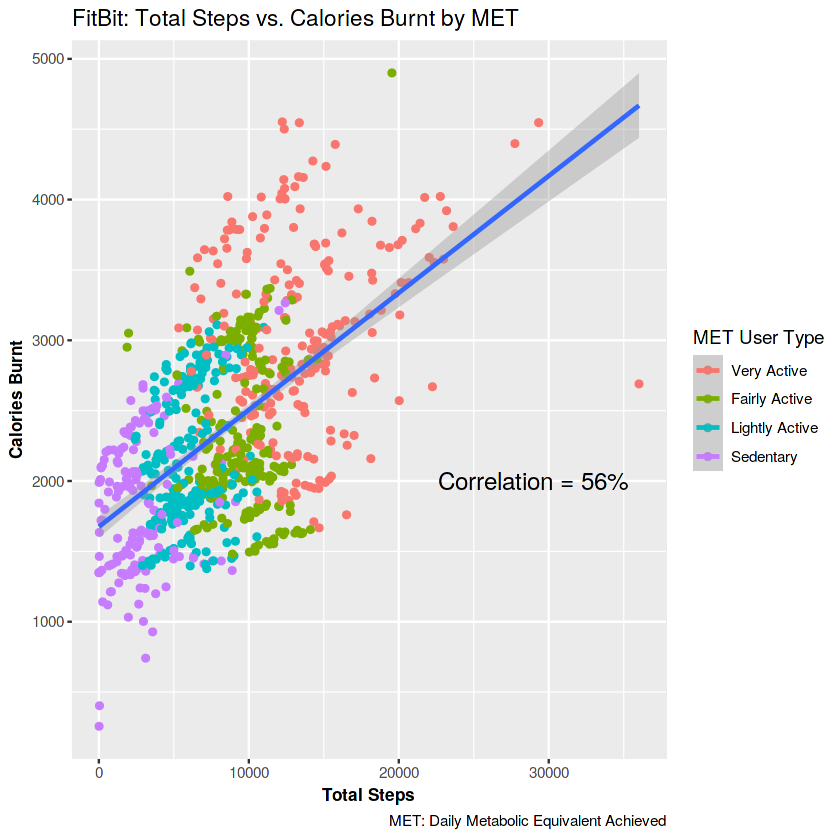

In [24]:
ggplot(usage_data, aes(x = TotalSteps, y =Calories, color = MET_user)) +geom_point() +
  geom_smooth(method = lm, aes(group = 1)) + labs(x = "Total Steps", y = "Calories Burnt", 
  title = "FitBit: Total Steps vs. Calories Burnt by MET", color = "MET User Type", 
  caption ="MET: Daily Metabolic Equivalent Achieved") + annotate("text",
  x = 29000, y = 2000, label = "Correlation = 56%", size = 5) + theme(axis.title.x = element_text(size = 10, 
  face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

`geom_smooth()` using formula 'y ~ x'



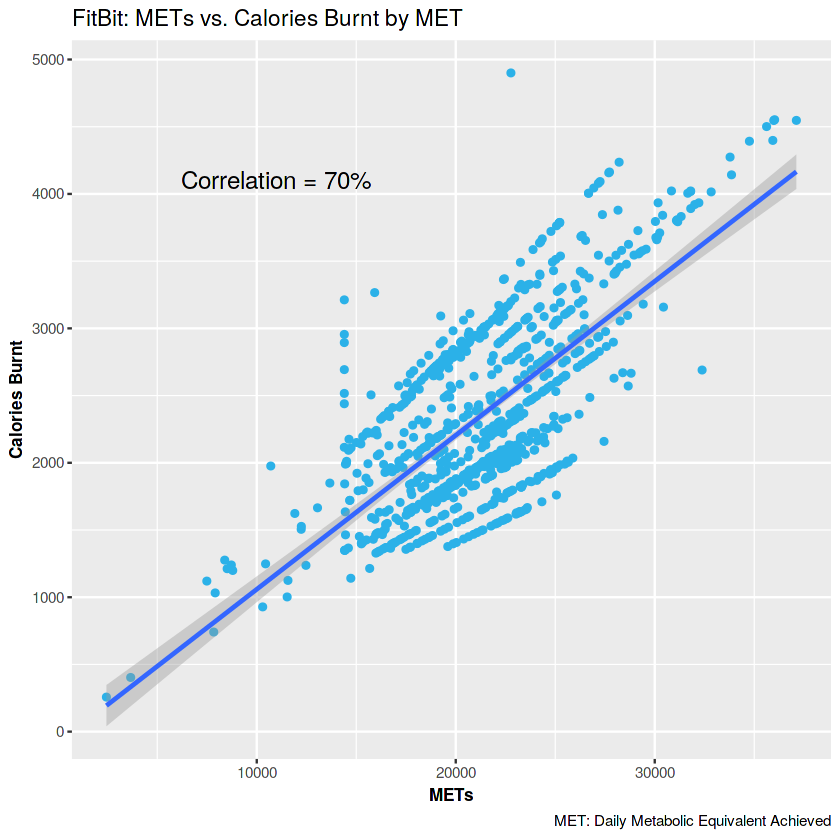

In [25]:
ggplot(usage_data, aes(x = METs, y = Calories)) + geom_point(color = "#2BB1E8") +
  geom_smooth(method = lm, aes(group = 1)) + labs(x = "METs", y = "Calories Burnt", 
  title = "FitBit: METs vs. Calories Burnt by MET", caption ="MET: Daily Metabolic Equivalent Achieved") +
  annotate("text", x =11000, y = 4100, label = "Correlation = 70%", size = 5) +
  theme(axis.title.x = element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

Since there seems to be a *higher correlation* of calories burnt with **METs** as opposed to **Total Steps**, let's take a closer look at the calories burnt by users based on their daily Metabolic equivalents.

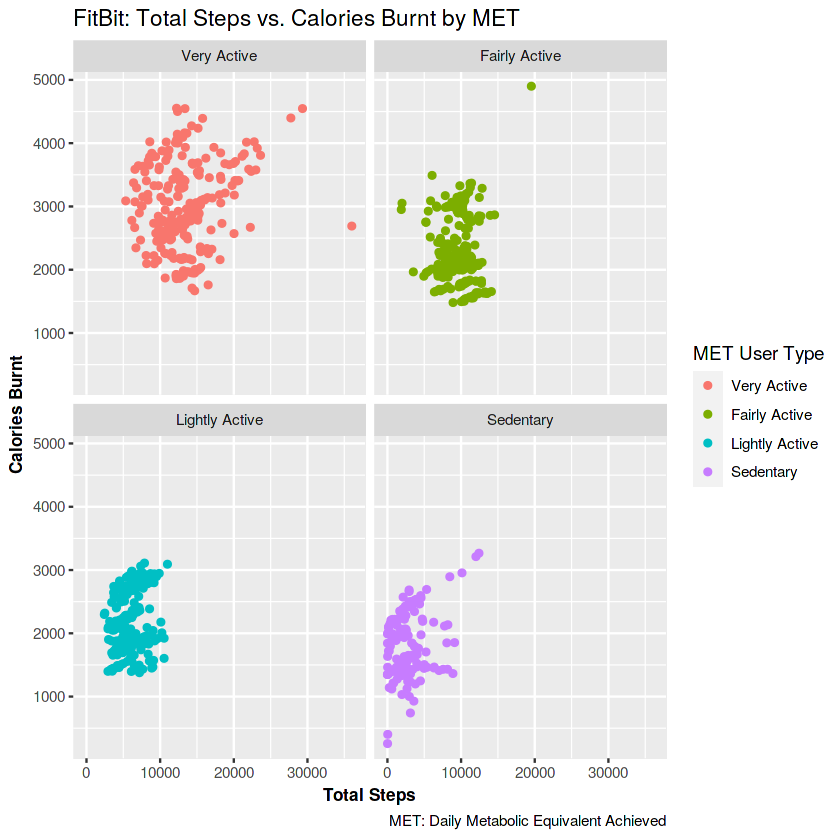

In [26]:
ggplot(usage_data, aes(x = TotalSteps, y = Calories, color = MET_user)) + geom_point() + 
  facet_wrap(~MET_user) + labs(x = "Total Steps", y ="Calories Burnt", 
  title = "FitBit: Total Steps vs. Calories Burnt by MET", color = "MET User Type", caption = "MET: Daily Metabolic Equivalent Achieved") +
  theme(axis.title.x = element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

This should fit hand in hand with the numbers for different categorizations for **Active Minutes** versus **Calories** burnt as well, let's just check to make sure!

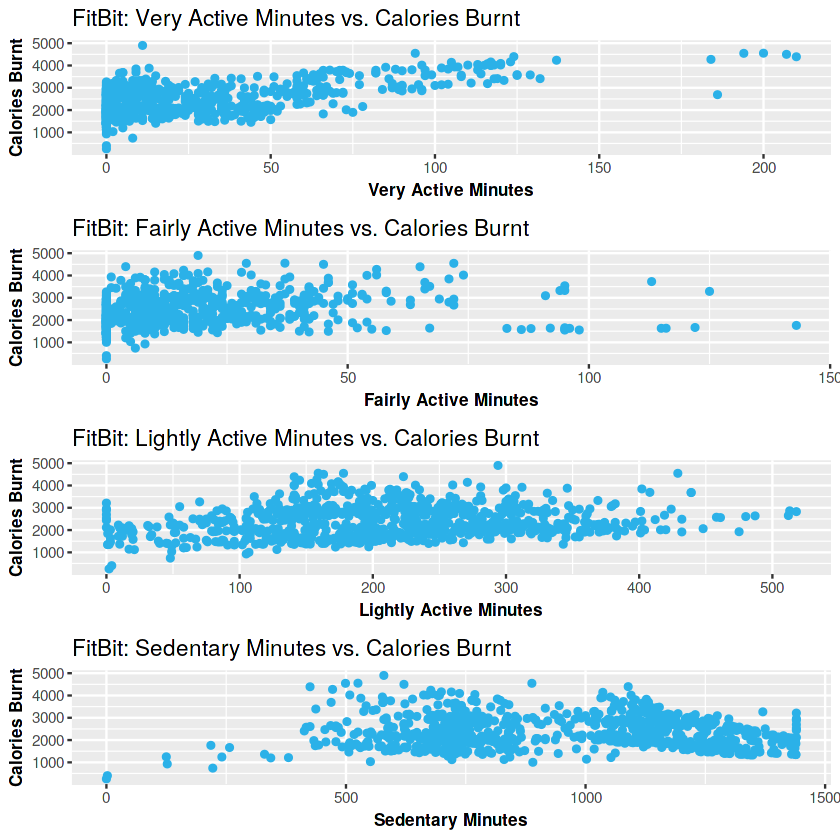

In [27]:
# creating a grid of distributions based on activity minutes versus calories
very_active_user <- ggplot(usage_data, aes(x = VeryActiveMinutes, y = Calories)) + geom_point(color = "#2BB1E8") +
  labs(x = "Very Active Minutes", y ="Calories Burnt", 
  title = "FitBit: Very Active Minutes vs. Calories Burnt") +
  theme(axis.title.x = element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

fairly_active_user <- ggplot(usage_data, aes(x = FairlyActiveMinutes, y = Calories)) + geom_point(color = "#2BB1E8") +
  labs(x = "Fairly Active Minutes", y ="Calories Burnt", 
  title = "FitBit: Fairly Active Minutes vs. Calories Burnt") +
  theme(axis.title.x = element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

lightly_active_user <- ggplot(usage_data, aes(x = LightlyActiveMinutes, y = Calories)) + geom_point(color = "#2BB1E8") +
  labs(x = "Lightly Active Minutes", y ="Calories Burnt", 
  title = "FitBit: Lightly Active Minutes vs. Calories Burnt") +
  theme(axis.title.x = element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

sedentary_user <- ggplot(usage_data, aes(x = SedentaryMinutes, y = Calories)) + geom_point(color = "#2BB1E8") +
  labs(x = "Sedentary Minutes", y ="Calories Burnt", 
  title = "FitBit: Sedentary Minutes vs. Calories Burnt") +
  theme(axis.title.x = element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

grid.arrange(very_active_user, fairly_active_user, lightly_active_user, sedentary_user, nrow = 4)

It is unsuprising here that all the correlations are positive (on track with our hypothesis following the **MET User Type** plots), however there are a couple noticable points here worth exploring.

1. First, it seems that we have some clustering of data points around the **0** mark. This is observed at higher amounts as strenuous activity increases.

2. Second, sedentary minute times are extremely high (which also means that higher minutes are needed for equivalent calorie burn rates)

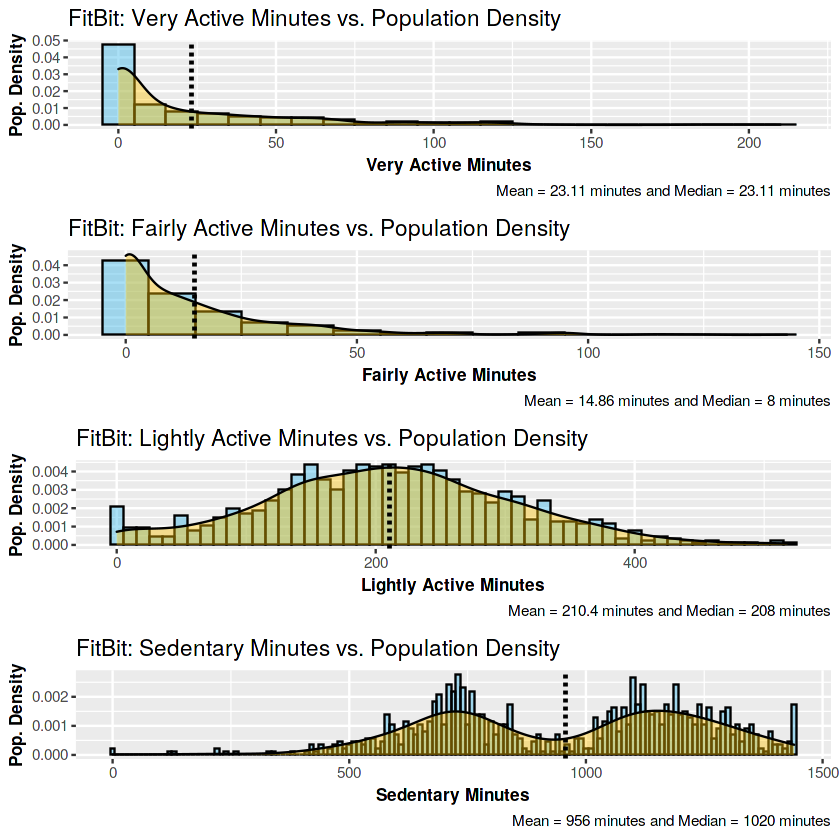

In [28]:
# Population distributions based on activity type
very_active_pop <- ggplot(usage_data, aes(x = VeryActiveMinutes)) + geom_histogram(aes(y=..density..), binwidth = 10, alpha = 0.4, fill = "#2BB1E8", color = "black") +
  geom_density(alpha = 0.4, fill = "#FFC300") + geom_vline(aes(xintercept = 
  mean(VeryActiveMinutes, na.rm = TRUE)), color = "black", linetype = "dashed", size = 1) +
  labs(x = "Very Active Minutes", y = "Pop. Density", title = "FitBit: Very Active Minutes vs. Population Density",
  caption = "Mean = 23.11 minutes and Median = 23.11 minutes") + theme(axis.title.x = 
  element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

fairly_active_pop <- ggplot(usage_data, aes(x = FairlyActiveMinutes)) + geom_histogram(aes(y=..density..), binwidth = 10, alpha = 0.4, fill = "#2BB1E8", color = "black") +
  geom_density(alpha = 0.4, fill = "#FFC300") + geom_vline(aes(xintercept = 
  mean(FairlyActiveMinutes, na.rm = TRUE)), color = "black", linetype = "dashed", size = 1) +
  labs(x = "Fairly Active Minutes", y = "Pop. Density", title = "FitBit: Fairly Active Minutes vs. Population Density",
  caption = "Mean = 14.86 minutes and Median = 8 minutes") + theme(axis.title.x = 
  element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

lightly_active_pop <- ggplot(usage_data, aes(x = LightlyActiveMinutes)) + geom_histogram(aes(y=..density..), binwidth = 10, alpha = 0.4, fill = "#2BB1E8", color = "black") +
  geom_density(alpha = 0.4, fill = "#FFC300") + geom_vline(aes(xintercept = 
  mean(LightlyActiveMinutes, na.rm = TRUE)), color = "black", linetype = "dashed", size = 1) +
  labs(x = "Lightly Active Minutes", y = "Pop. Density", title = "FitBit: Lightly Active Minutes vs. Population Density",
  caption = "Mean = 210.4 minutes and Median = 208 minutes") + theme(axis.title.x = 
  element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

Sedentary_pop <- ggplot(usage_data, aes(x = SedentaryMinutes)) + geom_histogram(aes(y=..density..), binwidth = 10, alpha = 0.4, fill = "#2BB1E8", color = "black") +
  geom_density(alpha = 0.4, fill = "#FFC300") + geom_vline(aes(xintercept = 
  mean(SedentaryMinutes, na.rm = TRUE)), color = "black", linetype = "dashed", size = 1) +
  labs(x = "Sedentary Minutes", y = "Pop. Density", title = "FitBit: Sedentary Minutes vs. Population Density",
  caption = "Mean = 956 minutes and Median = 1020 minutes") + theme(axis.title.x = 
  element_text(size = 10, face = "bold"), axis.title.y = element_text(size = 10, face = "bold"))

grid.arrange(very_active_pop, fairly_active_pop, lightly_active_pop, Sedentary_pop, nrow = 4)

## 5. Summary & Recommendations
To summarize, there are a couple key inferences that can be made looking at this study:

* There is a high number of inefficient sleepers in the population, with a mean *sleep latency* time of **39.59 minutes**.
* Sleep times are adequate for the population with an average of **6.99 hours** spent sleeping.
* **METs** were a much better indicator of **calories burnt** as opposed to **Total Steps**; with a *correlation* of **70%** versus **56%**.
* Very Active and Fairly Active minutes are the biggest factors in calories burnt, however majority of users gravitate in the **lightly active** and **sedentary** minute categories. 

These points can be used to create several avenues of improvement for the company at hand, to increase business value for the customer:

**Recommendation 1:** All participants that used the *FitBit* products were experiencing high **sleep latency** times. As *Bellabeat* products offer synchronous data sharing between their products through their app, better integration of sleep detection and app usage can be created. Some features can include coupling sleep-timers with features such as the screen-time to notify users of idle time in bed. Ecosystem integration with phone apps can be a selling point for increased health benefits and lifestyle. Here is some supplementary data talking about the practical effects of [sleep latency](https://www.healthline.com/health/healthy-sleep/how-long-does-it-take-to-fall-asleep) as well as [research conducted](https://www.sciencedirect.com/topics/nursing-and-health-professions/sleep-latency#:~:text=Normal%20adult%20mean%20sleep%20latency,min%20is%20diagnostic%20of%20sleepiness.) on the topic.

**Recommendation 2:** **METs** or metabolic equivalents can be used to encourage users to do certain activities based on preferences, since the caloric burn-rate differs based on activity (meaning that *METs* are a better indicator of health outcomes, as they are more specific compared to **step counts**). These preferences can be selected at the beginning of a product purchase/setup and can be used to integrate with user activity. [Here](https://www.healthline.com/health/what-are-mets) is some supplementary reading on the benefits of measuring physical activity using **MET** as well as [research](https://www.hsph.harvard.edu/nutritionsource/staying-active/) provided by the Harvard health journal that go in-depth as to the measurement and terminology.

**Recommendation 3:** Since the user base is distributed on the basis of two distinct categories. The first being more *leisurely* users that are not as active and secondly, a more *active* user base that is utilizing the product. I would recommend segmenting the market with two different products that cater to two different audiences, that might better enjoy the baseline features as well as the specialization for their target demographic. This could mean an increased **data-focus** for *active users* that have better tracking capabilities and more **app integration** to build around the schedules of *leisurely users*.

## 6. Data Limitations
There are a couple caveats regarding the dataset that readers should keep in mind, that might skew the research results of the study.

* Time-Series: The data was recorded over the span of **1 month** which may not provide sufficient evidence to create actionable outcomes based on the results of this study. Further research over a longer period of time may prove necessary.
* Limited Particpants: There were **33 participants** in total with **less** numbers for different aspects of the research **(24 for sleep, 8 recorded weight data)**. This could result in *selection or sampling bias* that may provide inaccurate results. 